# A/B Testing Project

### Task: to evaluate an A/B test results launched by a former colleague in the big online store.

## Table of Contents

[Downloading data and general info¶](#step1) <br>
[Data preprocessing](#step2) <br> 
[EDA](#step3) <br> 
[A/B test results evaluation](#step4) <br>
[Conclusion](#conclusion)<br>

## Downloading data and general info <a id='step1'></a>

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math
import datetime

In [3]:
marketing_events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events_us.csv')
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


name — the name of the marketing event <br>
regions — regions where the ad campaign will be held <br>
start_dt — campaign start date <br>
finish_dt — campaign end date

In [4]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [5]:
new_users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users_us.csv')
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


user_id <br>
first_date — sign-up date <br>
region <br>
device — device used to sign up

In [6]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [7]:
test_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events_us.csv')
test_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


user_id <br>
event_dt — event date and time <br>
event_name — event type name <br>
details — additional data on the event (for instance, the order total in USD for purchase events)


In [8]:
test_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [9]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants_us.csv')
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


user_id <br>
ab_test — test name <br>
group — the test group the user belonged to <br>

In [10]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


We have downloaded 4 datasets containing information on the users of the online store. The info is excessive, we will have to filter the relevant data for the task.

## Data preprocessing <a id='step2'></a>

**Do types need to be converted?**

In [11]:
marketing_events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events_us.csv', parse_dates=['start_dt', 'finish_dt'])
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [12]:
new_users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users_us.csv', dtype={'device': 'category', 'region': 'category'},
                  parse_dates=['first_date'])
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  category      
 3   device      61733 non-null  category      
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 1.1+ MB


In [13]:
test_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events_us.csv', dtype={'event_name': 'category'}, parse_dates=['event_dt'])
test_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  category      
 3   details     62740 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 10.5+ MB


In [14]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants_us.csv', dtype={'ab_test': 'category'})
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  18268 non-null  object  
 1   group    18268 non-null  object  
 2   ab_test  18268 non-null  category
dtypes: category(1), object(2)
memory usage: 303.5+ KB


All the tables were downloaded again parsing date columns and converting data to the category type where possible.

**Are there any missing or duplicate values? If so, how would you characterize them?**

In [15]:
test_events['details'].isna().value_counts()

True     377577
False     62740
Name: details, dtype: int64

In [16]:
test_events['details'].value_counts()

4.99      46362
9.99       9530
99.99      5631
499.99     1217
Name: details, dtype: int64

In [17]:
test_events['event_name'].value_counts()

login           189552
product_page    125563
purchase         62740
product_cart     62462
Name: event_name, dtype: int64

In [18]:
purchases = test_events[test_events['event_name'] == 'purchase']
purchases['details'].isna().value_counts()

False    62740
Name: details, dtype: int64

Test events table has a lot of missing values in the details column. Actually the only event type that got the details is the "purchase" - the amount of $ spent.

In [19]:
new_users.duplicated().value_counts()

False    61733
dtype: int64

In [20]:
test_events.duplicated().value_counts()

False    440317
dtype: int64

In [21]:
participants.duplicated().value_counts()

False    18268
dtype: int64

No duplicates found.

## EDA <a id='step3'></a>

In [22]:
new_users['user_id'].nunique()

61733

In [23]:
test_events['user_id'].nunique()

58703

In [24]:
active_users = test_events['user_id'].nunique() / new_users['user_id'].nunique() 
print("{0:.2%}".format(active_users))

95.09%


And we've got almost 5% of users who registered but didn't perform any actions.

**Merging tables:**

In [25]:
test_users = test_events.merge(participants,on='user_id').merge(new_users, on='user_id')
test_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106625 entries, 0 to 106624
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     106625 non-null  object        
 1   event_dt    106625 non-null  datetime64[ns]
 2   event_name  106625 non-null  category      
 3   details     15416 non-null   float64       
 4   group       106625 non-null  object        
 5   ab_test     106625 non-null  category      
 6   first_date  106625 non-null  datetime64[ns]
 7   region      106625 non-null  category      
 8   device      106625 non-null  category      
dtypes: category(4), datetime64[ns](2), float64(1), object(2)
memory usage: 5.3+ MB


In [26]:
test_users.duplicated().value_counts()

False    106625
dtype: int64

**Selecting relevant test only:**

In [27]:
test_users = test_users[test_users['ab_test'] == "interface_eu_test"]
test_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81927 entries, 0 to 106624
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     81927 non-null  object        
 1   event_dt    81927 non-null  datetime64[ns]
 2   event_name  81927 non-null  category      
 3   details     12085 non-null  float64       
 4   group       81927 non-null  object        
 5   ab_test     81927 non-null  category      
 6   first_date  81927 non-null  datetime64[ns]
 7   region      81927 non-null  category      
 8   device      81927 non-null  category      
dtypes: category(4), datetime64[ns](2), float64(1), object(2)
memory usage: 4.1+ MB


**Study conversion at different stages of the funnel.**

In [28]:
test_users['date'] = test_users['event_dt'].dt.floor('D')
events_by_date = test_users.groupby(['date']).agg({'event_name': 'count'}).reset_index()
events_by_date['date'] = events_by_date['date'].dt.strftime('%B %d, %Y')
events_by_date

,date,event_name
0,"December 07, 2020",2068
1,"December 08, 2020",2311
2,"December 09, 2020",2333
3,"December 10, 2020",2551
4,"December 11, 2020",2603
5,"December 12, 2020",3482
6,"December 13, 2020",3974
7,"December 14, 2020",4783
8,"December 15, 2020",4333
9,"December 16, 2020",4016


The last day  - 30th of December can not be considered relevant - it has too few events.

In [29]:
test_users_filtered = test_users.query('date <= "2020-12-29"')

In [30]:
users_per_event = test_users_filtered.groupby(['event_name']).agg({'user_id': ['count', 'nunique']}).reset_index()
users_per_event.columns = ['event_name', 'n_users', 'n_unique_users']
#users_per_event['at_least_one_time'] = users_per_event['n_unique_users'] / data_filtered['device_id'].nunique()
users_per_event = users_per_event.sort_values(by='n_users', ascending=False)
users_per_event.style.format({
    'n_users': '{:.0f}'.format,
    'n_unique_users': '{:.0f}'.format
})

,event_name,n_users,n_unique_users
3,login,35139,10849
1,product_page,23091,7166
2,purchase,12082,3713
0,product_cart,11599,3568


The fact that there more purchases than product_carts can be explained by the existence of the quick purchase button - excluding putting an item to the cart.

In [31]:
unique_users = test_users_filtered['user_id'].nunique()
unique_users

10850

In [32]:
n_login = users_per_event['n_unique_users'][3]
n_product_page = users_per_event['n_unique_users'][1]
n_purchase = users_per_event['n_unique_users'][2]
n_product_cart = users_per_event['n_unique_users'][0]

**Calculation of the total conversion:**

In [33]:
conversion_login = n_login/ unique_users
conversion_product_page = n_product_page / unique_users 
conversion_purchase = n_purchase / unique_users 
conversion_cart = n_product_cart / unique_users 
print("Login total conversion", "{0:.2%}".format(conversion_login))
print("Product page total conversion", "{0:.2%}".format(conversion_product_page))
print("Purchase total conversion", "{0:.2%}".format(conversion_purchase))
print("Cart total conversion", "{0:.2%}".format(conversion_cart))

Login total conversion 99.99%
Product page total conversion 66.05%
Purchase total conversion 34.22%
Cart total conversion 32.88%


**Building the funnel:**

In [34]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["Made log in", "Saw product page", "Added a product to cart", "Paid"],
    x = [n_login, n_product_page, n_product_cart, n_purchase],
textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}),
    )
fig.update_layout(
    title='Conversion Funnel')
fig.show()

**Is the number of events per user distributed equally among the samples?**

In [35]:
test_users_filtered.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device,date
0,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test,2020-12-07,EU,iPhone,2020-12-07
1,96F27A054B191457,2020-12-08 09:43:14,purchase,4.99,B,interface_eu_test,2020-12-07,EU,iPhone,2020-12-08
2,96F27A054B191457,2020-12-09 00:44:10,purchase,4.99,B,interface_eu_test,2020-12-07,EU,iPhone,2020-12-09
3,96F27A054B191457,2020-12-26 00:33:57,purchase,9.99,B,interface_eu_test,2020-12-07,EU,iPhone,2020-12-26
4,96F27A054B191457,2020-12-07 04:02:41,product_page,NaN,B,interface_eu_test,2020-12-07,EU,iPhone,2020-12-07


In [36]:
events_per_samples = test_users_filtered.groupby('group').agg({'event_name': 'count'})
events_per_samples

,event_name
group,
A,41556
B,40355


In [37]:
events_per_user = test_users_filtered.groupby(['user_id','group']).agg({'event_name': 'count'}).reset_index()
events_per_user.head()

,user_id,group,event_name
0,0002CE61FF2C4011,A,12
1,001064FEAAB631A1,B,6
2,001E72F50D1C48FA,B,6
3,002412F1EB3F6E38,A,8
4,002540BE89C930FB,A,9


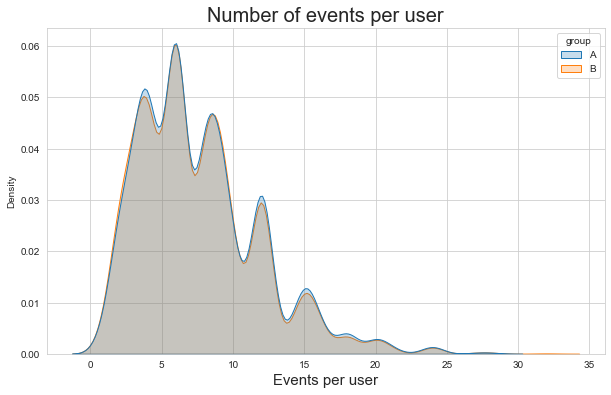

In [46]:
plt.figure(figsize=(10,6))
plot=sns.kdeplot(data=events_per_user, x='event_name', hue='group', color='b', fill=True) 
plot.set_title('Number of events per user', fontsize=20)
plot.set_xlabel('Events per user', fontsize=15)
sns.set_style("whitegrid") 

It is distributed more or less equally.

**Are there users who are present in both samples?**

In [38]:
users_group = test_users_filtered.groupby('user_id', as_index=False).agg({'group' : pd.Series.nunique})
group_duplicated = users_group.query('group>1')
group_duplicated['user_id'].count()

0

There are no users present in the both groups.

**How is the number of events distributed among days?**

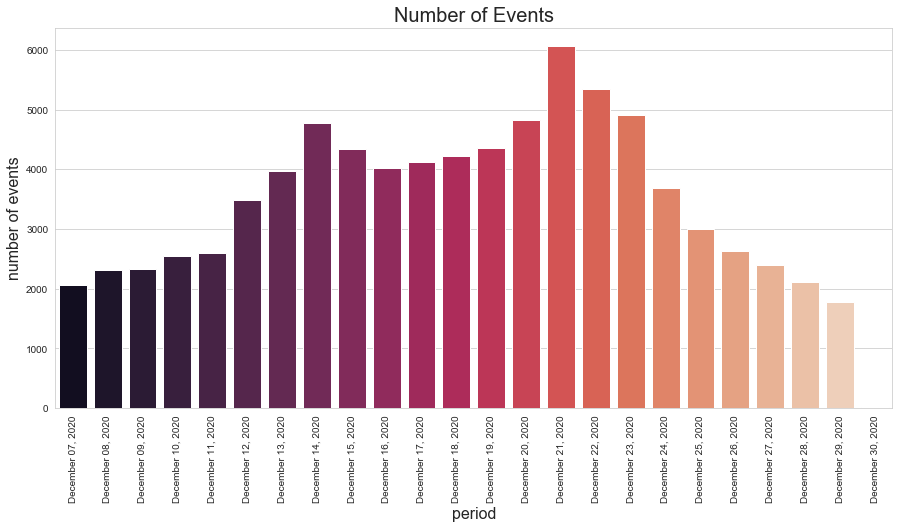

In [39]:
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
ax = sns.barplot(x="date", y="event_name", data=events_by_date,
                 palette="rocket")
plt.xticks(rotation=90)
ax.set(xlabel='period', ylabel='number of events')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.title('Number of Events', fontsize = 20)
plt.show()

We can see the growing number of actions with the peak on the 21st of December, then the activity slows down.

**Are there any peculiarities in the data that you have to take into account before starting the A/B test?**

In [40]:
users_per_samples = test_users_filtered.groupby('group').agg({'user_id': 'nunique'})
users_per_samples

,user_id
group,
A,5467
B,5383


In terms of number of participants in each group - the test is ok.

In [41]:
test_users_filtered.groupby('region').agg({'user_id': 'nunique'})


,user_id
region,
APAC,0
CIS,0
EU,10850
N.America,0


All of the are from EU region.

In terms of the launching period - the test falls on the Christmas & New Year Promo campaign which can influence all the processes a lot. Unless the goal isn't to test the campaign results, this timesetting is very undesirible.

In [42]:
test_users_filtered['first_date'].describe()

count                   81911
unique                     17
top       2020-12-14 00:00:00
freq                     7924
first     2020-12-07 00:00:00
last      2020-12-23 00:00:00
Name: first_date, dtype: object

As wee see the recruitment didn't stop on the 21th of December - we have users who's first activity was on the 23th of December.

## Evaluate the A/B test results: <a id='step4'></a>

**What can you say about the A/B test results?**

We will check whether the introduction of the new interface had in impact on all the stages of the funnel: login, product page visiting, cart page and purchase. We can not check the conversion of the 7th and 14th day, because there are users who are only few days after day signed up, but we will see the proportions in the groups with the data we have by now. <br>
Also we should take into account that the test was run during the Christmas and New Year marketing campaign which can totally srew the effect of the new interface introduction. 

**Use a z-test to check the statistical difference between the proportions.**

In [43]:
pivot_groups = test_users_filtered.pivot_table(index='event_name', values='user_id', columns='group', aggfunc=lambda x: x.nunique()).reset_index()
pivot_groups
#test_users.info()

group,event_name,A,B
0,product_cart,1756,1812
1,product_page,3639,3527
2,purchase,1931,1782
3,login,5466,5383


Hypothesis: <br>
**H0:** there's not a statistically significant difference between the groups A and B. <br>
**H1:** there is a significant difference between the proportions in groups A and B. <br>
<br>
A critical statistical significance level will be set at 0.05 as it is a commonly accepted one in the industry - alpha=0.05. <br>

In [44]:
def check_hypothesis(group1, group2, event, alpha=0.05):
    
   
    trials1 = test_users[test_users.group==group1]['user_id'].nunique()
    successes1 = pivot_groups[pivot_groups.event_name==event][group1].iloc[0]
    
    trials2=test_users[test_users.group==group2]['user_id'].nunique()
    successes2=pivot_groups[pivot_groups.event_name==event][group2].iloc[0]

    p1 = successes1/trials1

    p2 = successes2/trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)
  
    difference = p1 - p2
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
   
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)
    

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions for", event, 'and groups:',group1, ",", group2)
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different for", event,'and groups:',group1, ",", group2)
    print('\n')

In [45]:
for i in pivot_groups.event_name.unique():
    check_hypothesis("A","B", i, alpha=0.05)

p-value:  0.08746918913258162
Failed to reject the null hypothesis: there is no reason to consider the proportions different for product_cart and groups: A , B


p-value:  0.2518419682737163
Failed to reject the null hypothesis: there is no reason to consider the proportions different for product_page and groups: A , B


p-value:  0.014959088807690257
Rejecting the null hypothesis: there is a significant difference between the proportions for purchase and groups: A , B


p-value:  0.32103485047255065
Failed to reject the null hypothesis: there is no reason to consider the proportions different for login and groups: A , B




The z-test has shown that there is a statistical significance between the proportion in groups A and B on the stage of purchasing.

## Describe your conclusions regarding the EDA stage and the A/B test results. <a id='conclusion'></a>

First of all we had to deal with the incorrect technical task and description left to us by the former colleague. We found out that that there are 2 tests run simultaneously: recommendation system and new interface introduction. The correct one for us to evaluate was new interface introduction in EU region. <br>
We couldn't evaluate the conversion on the 14th day because there were users who signed up on the 23rd of December and haven't reached the 14th day yet. The 30th of December was considered as not representative as it has 10 to 20 times less observations than other days of test conducting. <br>
The number of participants was almost 11000 people instead of 6000 expected. All of them were from the EU region. <br>
The EDA stage of our analysis has shown that there were almost 5% of the users who signed up but never performed any action on the site. <br>
The study of the funnel has shown that there are more purchases than product cart placement stage, which can be explained by the existence of the quick purchase button - excluding putting an item to the cart. <br>
The number of events was growing, the peak of the actions taken by the users was on the 21st of December and then went down. <br>
The main issue with this A/B test is the timing. It falls exactly on the Christmas and New Year Promo Campaign. We will never be able to distinguish betweeen the influence of the campaign and the new interface features on the users' behavior.<br>
The A/B test has shown that there is a significant difference in proportion of users who made a purchase in the test and control groups. But this result actually says us not much about the interface because of the wrong timing. We wll have to conduct it again during the regular days.